In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import viz

COLORS, PAGE_WIDTH, ROW_HEIGHT = viz.set_plots()

def rolling_mean(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


In [18]:
prices = pd.read_csv("../data/prices.csv", index_col=0, parse_dates=True)
prices2023 = prices.loc[
        f"2023-01-01" :f"2023-01-31"
    ].lmp

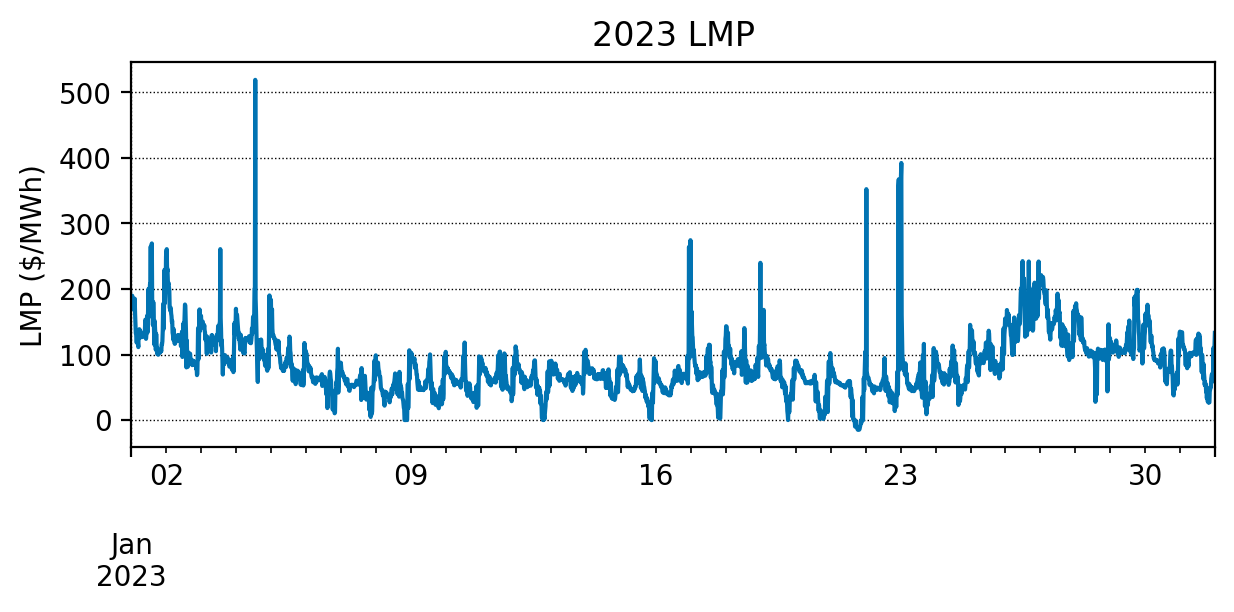

In [19]:
f, ax = plt.subplots(1, 1, figsize=(PAGE_WIDTH, ROW_HEIGHT))
prices2023.plot(ax=ax)
ax.set_title("2023 LMP")
ax.set_ylabel("LMP ($/MWh)")
plt.show()

In [20]:
# from sacRun import main as sacRun

# sacRun(nYears=None, nMonths = 5, month= [1], test = 1, ep=800)

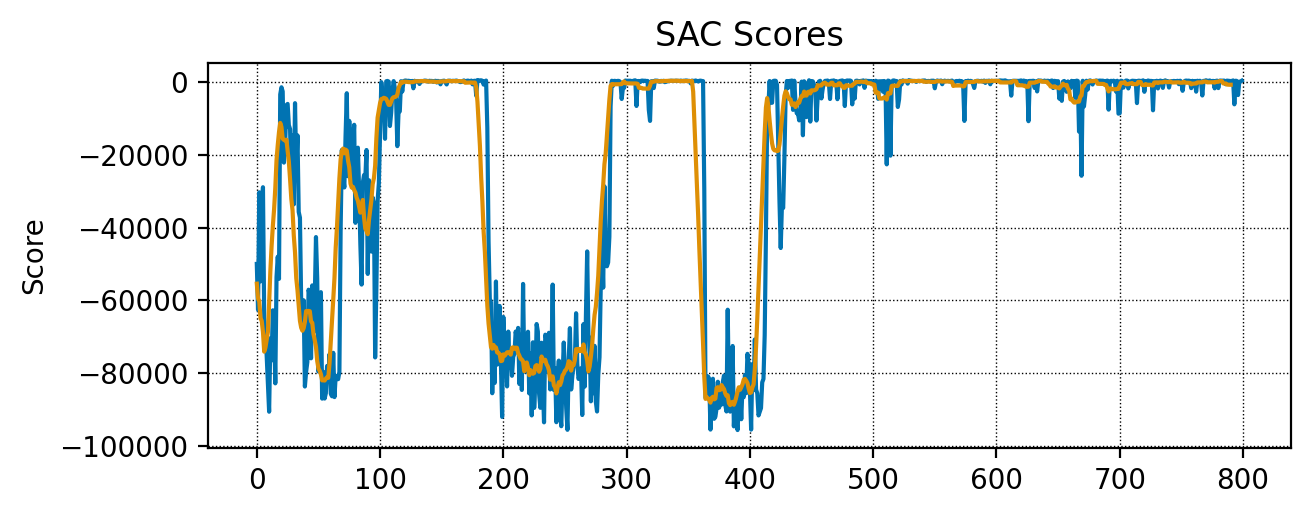

In [21]:
scores = np.load("SACResults/scores.npy")

f, ax = plt.subplots(1, 1, figsize=(PAGE_WIDTH, ROW_HEIGHT))
ax.plot(scores)
ax.plot(rolling_mean(scores, 10))
ax.set_title("SAC Scores")
ax.set_ylabel("Score")
plt.show()


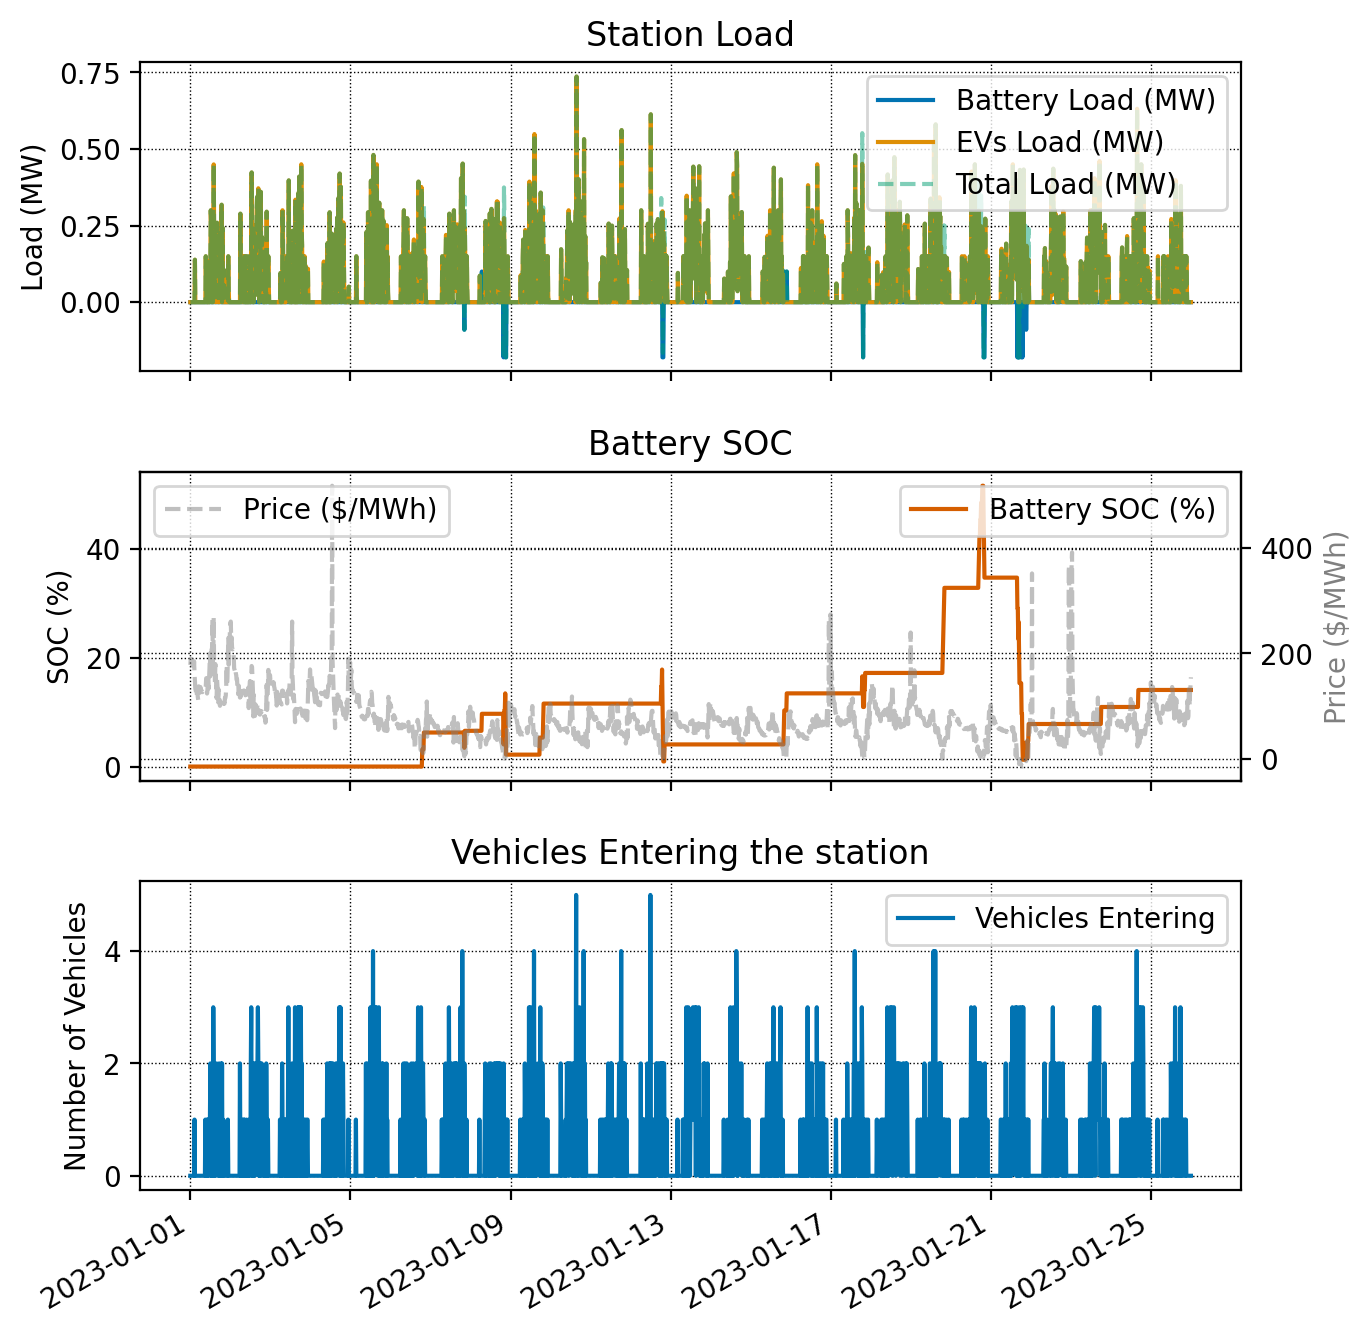

In [22]:
history = pd.read_csv("SACResults/sac_history.csv", index_col=0, parse_dates=True)

START, END = "2023-01-01", "2023-01-25"

viz.plotOperations(history, START, END, save_path="SACResults/policy.png")

In [24]:
from softActorCritic import SAC

from tqdm import tqdm
rewards = []
max_power = []
for _ in tqdm(range(100)):
    PolicyPPO = SAC([])
    pricesTest = pd.concat([prices2023[-4:], prices2023])
    history = PolicyPPO.test(pricesTest)
    rewards.append(history.reward.sum())
    max_power.append(history.load.max())
    # print(history.reward.sum())

print("Reward Metrics: ", np.mean(rewards), "$")
print("Max Power Metrics: ", np.mean(max_power), "MW")


100%|██████████| 100/100 [05:18<00:00,  3.18s/it]

Reward Metrics:  11350.31808233123 $
Max Power Metrics:  0.6204460392148509 MW
